LAB 9 CLASS TASK


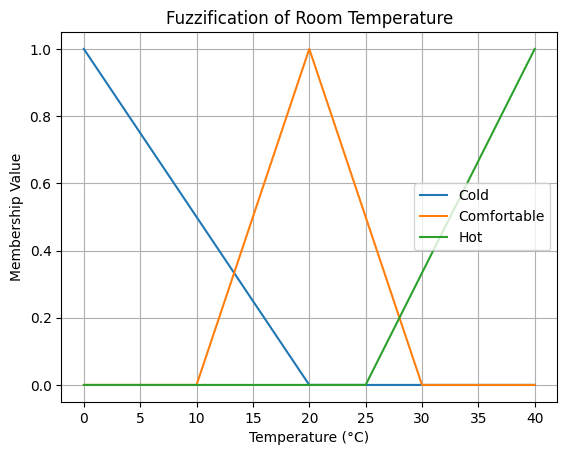

In [1]:
#CLASS TASK 1
#Task 1: Fuzzification of Room Temperature):
#You are designing a smart air conditioning system for a house. The system must categorize room
#temperatures into "Cold," "Comfortable," and "Hot" to determine appropriate actions. For instance, when
#the temperature is 15°C, the system should identify it as "Cold." Define the membership functions for these
#categories and visualize their behavior across the range of temperatures (0–40°C)

import numpy as np
import matplotlib.pyplot as plt
# Temperature range
temperature = np.arange(0, 41, 1)
# Membership functions (simple)
cold = np.maximum(0, np.minimum((20 - temperature) / 20, 1))
comfortable = np.maximum(0, np.minimum((temperature - 10) / 10, (30 -
temperature) / 10))
hot = np.maximum(0, np.minimum((temperature - 25) / 15, 1))
# Plotting
plt.plot(temperature, cold, label="Cold")
plt.plot(temperature, comfortable, label="Comfortable")
plt.plot(temperature, hot, label="Hot")
plt.xlabel("Temperature (°C)")
plt.ylabel("Membership Value")
plt.title("Fuzzification of Room Temperature")
plt.legend()
plt.grid()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.5 MB/s eta 0:00:00
Temperature: 25°C
Crisp Output: 50.0 %


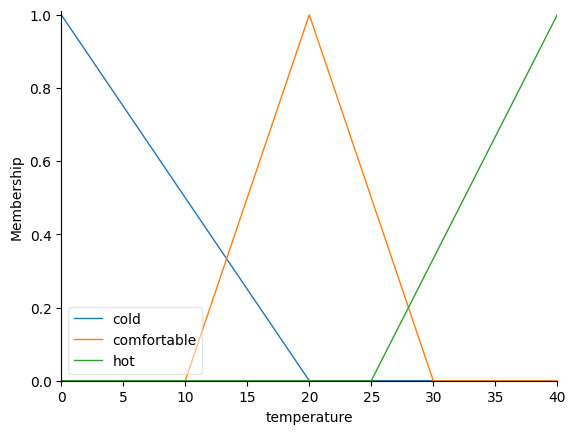

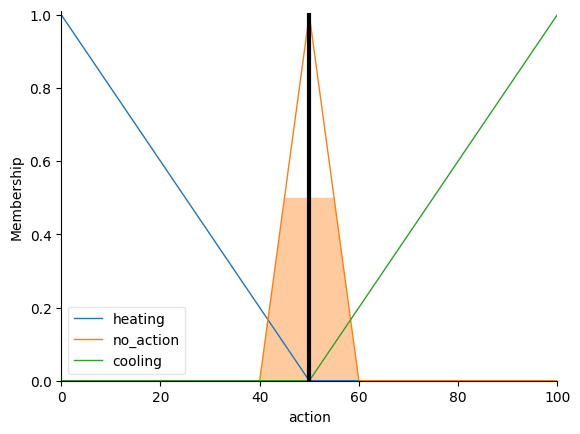

In [3]:
#CLASS Task 2: (Defuzzification):
#A new feature in a smart thermostat is being tested. For a temperature of 25°C, the
#system must determine the exact percentage of heating or cooling required. Simulate
#and display the crisp output of the fuzzy logic system. Analyze how the system
#balances heating or cooling at this temperature
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
# Input variable
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
# Output variable
action = ctrl.Consequent(np.arange(0, 101, 1), 'action')
# Membership functions (Input)
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [10, 20,
30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])
# Membership functions (Output)
action['heating'] = fuzz.trimf(action.universe, [0, 0, 50])
action['no_action'] = fuzz.trimf(action.universe, [40, 50, 60])
action['cooling'] = fuzz.trimf(action.universe, [50, 100, 100])
# Rules
rule1 = ctrl.Rule(temperature['cold'], action['heating'])
rule2 = ctrl.Rule(temperature['comfortable'], action['no_action'])
rule3 = ctrl.Rule(temperature['hot'], action['cooling'])
# Control system
system = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system)
# Input temperature
simulation.input['temperature'] = 25
simulation.compute()
# Print output
print("Temperature: 25°C")
print("Crisp Output:", round(simulation.output['action'], 2), "%")
# Plot graphs
temperature.view()
action.view(sim=simulation)
plt.show()